In [117]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# reproducibility
np.random.seed(42)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

In [119]:
# Load the datasets
train_data = pd.read_csv('train.csv', index_col=0)
test_data = pd.read_csv('test.csv', index_col=0)

print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Show columns
print(f"\nTraining columns: {list(train_data.columns)}")
print(f"Testing columns: {list(test_data.columns)}")

Training data shape: (1000, 19)
Testing data shape: (1000, 21)

Training columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Testing columns: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [85]:
# Prepare training data
X_train = train_data.drop(columns=['zipcode', 'price'])
y_train = train_data['price'] / 1000  # Divide by 1000

# Prepare testing data  
cols_to_drop_test = ['zipcode', 'price']
if 'id' in test_data.columns:
    cols_to_drop_test.append('id')
if 'date' in test_data.columns:
    cols_to_drop_test.append('date')

X_test = test_data.drop(columns=cols_to_drop_test)
y_test = test_data['price'] / 1000  # Divide by 1000

print(f"\nData separated successfully")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"\nFeatures used ({X_train.shape[1]} total):")
print(list(X_train.columns))


Data separated successfully
Training features shape: (1000, 17)
Testing features shape: (1000, 17)

Features used (17 total):
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


# Problem 2:  Linear regression (15 points) 

## Part 1

In [105]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Formats
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Numpy arrays for later use
X_train_np = X_train_scaled
y_train_np = y_train.values
X_test_np = X_test_scaled  
y_test_np = y_test.values

print("Features standardized (mean ≈ 0, std ≈ 1)")
print(f"  Verification: mean = {X_train_scaled.mean():.6f}, std = {X_train_scaled.std():.6f}")

Features standardized (mean ≈ 0, std ≈ 1)
  Verification: mean = -0.000000, std = 1.000000


In [107]:
# Train the linear regression model
model_sklearn = LinearRegression()
model_sklearn.fit(X_train_scaled_df, y_train)

print("Model trained successfully!")

Model trained successfully!


In [11]:
# Display all coefficients
print("="*80)
print("LINEAR REGRESSION COEFFICIENTS")
print("="*80)
print(f"\nIntercept (θ₀): {model_sklearn.intercept_:.6f}\n")
print("Feature Coefficients:")
print("-"*80)

for feature, coef in zip(X_train.columns, model_sklearn.coef_):
    print(f"  {feature:20s}: {coef:10.6f}")

LINEAR REGRESSION COEFFICIENTS

Intercept (θ₀): 520.414834

Feature Coefficients:
--------------------------------------------------------------------------------
  bedrooms            : -12.521962
  bathrooms           :  18.527633
  sqft_living         :  56.748837
  sqft_lot            :  10.881868
  floors              :   8.043721
  waterfront          :  63.742900
  view                :  48.200109
  condition           :  12.964269
  grade               :  92.231475
  sqft_above          :  48.290089
  sqft_basement       :  27.137032
  yr_built            : -67.643117
  yr_renovated        :  17.271380
  lat                 :  78.375737
  long                :  -1.035203
  sqft_living15       :  45.577658
  sqft_lot15          : -12.930091


In [109]:
# Calculate training metrics
y_train_pred_sklearn = model_sklearn.predict(X_train_scaled_df)
train_mse_sklearn = mean_squared_error(y_train, y_train_pred_sklearn)
train_r2_sklearn = r2_score(y_train, y_train_pred_sklearn)

print("="*80)
print("TRAINING SET METRICS")
print("="*80)
print(f"MSE:  {train_mse_sklearn:.6f}")
print(f"R²:   {train_r2_sklearn:.6f}")
print(f"RMSE: {np.sqrt(train_mse_sklearn):.6f}")

TRAINING SET METRICS
MSE:  31486.167776
R²:   0.726533
RMSE: 177.443421


## Part 2: Evaluate on Testing Set

In [15]:
# Calculate testing metrics
y_test_pred_sklearn = model_sklearn.predict(X_test_scaled_df)
test_mse_sklearn = mean_squared_error(y_test, y_test_pred_sklearn)
test_r2_sklearn = r2_score(y_test, y_test_pred_sklearn)

print("="*80)
print("TESTING SET METRICS")
print("="*80)
print(f"MSE:  {test_mse_sklearn:.6f}")
print(f"R²:   {test_r2_sklearn:.6f}")
print(f"RMSE: {np.sqrt(test_mse_sklearn):.6f}")

TESTING SET METRICS
MSE:  57628.154706
R²:   0.654356
RMSE: 240.058648


## Part 3: Interpretation

In [17]:
# Rank features by importance (absolute coefficient value)
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model_sklearn.coef_,
    'Abs_Coefficient': np.abs(model_sklearn.coef_)
})
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("="*80)
print("FEATURES RANKED BY IMPORTANCE")
print("="*80)
print(coef_df.to_string(index=False))

FEATURES RANKED BY IMPORTANCE
      Feature  Coefficient  Abs_Coefficient
        grade    92.231475        92.231475
          lat    78.375737        78.375737
     yr_built   -67.643117        67.643117
   waterfront    63.742900        63.742900
  sqft_living    56.748837        56.748837
   sqft_above    48.290089        48.290089
         view    48.200109        48.200109
sqft_living15    45.577658        45.577658
sqft_basement    27.137032        27.137032
    bathrooms    18.527633        18.527633
 yr_renovated    17.271380        17.271380
    condition    12.964269        12.964269
   sqft_lot15   -12.930091        12.930091
     bedrooms   -12.521962        12.521962
     sqft_lot    10.881868        10.881868
       floors     8.043721         8.043721
         long    -1.035203         1.035203


In [19]:
# Interpretation summary
print("\n" + "="*80)
print("INTERPRETATION SUMMARY")
print("="*80)

print(f"\n1. TOP 3 CONTRIBUTING FEATURES:")
for idx, row in coef_df.head(3).iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"   - {row['Feature']}: {row['Coefficient']:.4f}")
    print(f"     → 1 std increase {direction} price by ${abs(row['Coefficient']):.2f}k")

print(f"\n2. MODEL FIT QUALITY:")
print(f"   - Training R² = {train_r2_sklearn:.4f} ({train_r2_sklearn*100:.1f}% variance explained)")
print(f"   - Testing R²  = {test_r2_sklearn:.4f} ({test_r2_sklearn*100:.1f}% variance explained)")

print(f"\n3. PREDICTION ERROR:")
print(f"   - Testing RMSE = ${np.sqrt(test_mse_sklearn):.2f}k")
print(f"   - In dollars: ±${np.sqrt(test_mse_sklearn)*1000:.0f}")

print(f"\n4. GENERALIZATION:")
ratio = test_mse_sklearn / train_mse_sklearn
print(f"   - Test/Train MSE ratio = {ratio:.4f}")
if ratio < 1.1:
    print(f"   - Excellent generalization (minimal overfitting)")
elif ratio < 1.3:
    print(f"   - Good generalization (slight overfitting)")
else:
    print(f"   - Poor generalization (significant overfitting)")


INTERPRETATION SUMMARY

1. TOP 3 CONTRIBUTING FEATURES:
   - grade: 92.2315
     → 1 std increase increases price by $92.23k
   - lat: 78.3757
     → 1 std increase increases price by $78.38k
   - yr_built: -67.6431
     → 1 std increase decreases price by $67.64k

2. MODEL FIT QUALITY:
   - Training R² = 0.7265 (72.7% variance explained)
   - Testing R²  = 0.6544 (65.4% variance explained)

3. PREDICTION ERROR:
   - Testing RMSE = $240.06k
   - In dollars: ±$240059

4. GENERALIZATION:
   - Test/Train MSE ratio = 1.8303
   - Poor generalization (significant overfitting)


---
# Problem 3: Implementing Closed-Form Solution (15 points)

## Implementation

In [183]:
def train_linear_regression_closed_form(X, y):
    """
    Train linear regression using closed-form solution.
    Formula: θ = (X^T X)^(-1) X^T y
    """
    N = X.shape[0]
    # Add column of ones for intercept
    X_with_intercept = np.column_stack([np.ones(N), X])
    
    # Closed-form solution
    XTX = X_with_intercept.T @ X_with_intercept
    XTy = X_with_intercept.T @ y
    theta = np.linalg.solve(XTX, XTy)
    
    return theta


def predict_linear_regression(X, theta):
    """Make predictions using learned parameters"""
    N = X.shape[0]
    X_with_intercept = np.column_stack([np.ones(N), X])
    y_pred = X_with_intercept @ theta
    return y_pred

print("Closed-form functions defined!")

Closed-form functions defined!


In [23]:
# Train using our implementation
theta_closed = train_linear_regression_closed_form(X_train_np, y_train_np)

print("="*80)
print("MY IMPLEMENTATION - COEFFICIENTS")
print("="*80)
print(f"\nIntercept (θ₀): {theta_closed[0]:.6f}\n")
print("Feature Coefficients:")
print("-"*80)

for i, feature in enumerate(X_train.columns):
    print(f"  {feature:20s}: {theta_closed[i+1]:10.6f}")

MY IMPLEMENTATION - COEFFICIENTS

Intercept (θ₀): 520.414834

Feature Coefficients:
--------------------------------------------------------------------------------
  bedrooms            : -12.521962
  bathrooms           :  18.527633
  sqft_living         : 805.044513
  sqft_lot            :  10.881868
  floors              :   8.043721
  waterfront          :  63.742900
  view                :  48.200109
  condition           :  12.964269
  grade               :  92.231475
  sqft_above          : -617.541764
  sqft_basement       : -352.854033
  yr_built            : -67.643117
  yr_renovated        :  17.271380
  lat                 :  78.375737
  long                :  -1.035203
  sqft_living15       :  45.577658
  sqft_lot15          : -12.930091


## Evaluate and Compare with sklearn

In [181]:
# Make predictions
y_train_pred_closed = predict_linear_regression(X_train_np, theta_closed)
y_test_pred_closed = predict_linear_regression(X_test_np, theta_closed)

# Calculate metrics
train_mse_closed = mean_squared_error(y_train_np, y_train_pred_closed)
train_r2_closed = r2_score(y_train_np, y_train_pred_closed)
test_mse_closed = mean_squared_error(y_test_np, y_test_pred_closed)
test_r2_closed = r2_score(y_test_np, y_test_pred_closed)

print("="*80)
print("MY IMPLEMENTATION - METRICS")
print("="*80)
print(f"Training: MSE = {train_mse_closed:.6f}, R² = {train_r2_closed:.6f}")
print(f"Testing:  MSE = {test_mse_closed:.6f}, R² = {test_r2_closed:.6f}")

MY IMPLEMENTATION - METRICS
Training: MSE = 31486.167776, R² = 0.726533
Testing:  MSE = 57628.154706, R² = 0.654356


In [179]:
# Comparison with sklearn
comparison_df = pd.DataFrame({
    'Metric': ['Train MSE', 'Train R²', 'Test MSE', 'Test R²'],
    'My Implementation': [train_mse_closed, train_r2_closed, test_mse_closed, test_r2_closed],
    'sklearn': [train_mse_sklearn, train_r2_sklearn, test_mse_sklearn, test_r2_sklearn],
    'Difference': [
        abs(train_mse_closed - train_mse_sklearn),
        abs(train_r2_closed - train_r2_sklearn),
        abs(test_mse_closed - test_mse_sklearn),
        abs(test_r2_closed - test_r2_sklearn)
    ]
})

print("\n" + "="*80)
print("COMPARISON WITH SKLEARN")
print("="*80)
print("\n" + comparison_df.to_string(index=False))


COMPARISON WITH SKLEARN

   Metric  My Implementation      sklearn   Difference
Train MSE       31486.167776 31486.167776 7.275958e-12
 Train R²           0.726533     0.726533 0.000000e+00
 Test MSE       57628.154706 57628.154706 6.548362e-11
  Test R²           0.654356     0.654356 3.330669e-16


In [177]:
# Validation
max_diff = comparison_df['Difference'].max()

print("\n" + "="*80)
print("VALIDATION")
print("="*80)
print(f"Maximum difference: {max_diff:.2e}")

if max_diff < 1e-10:
    print("Results are identical!")
elif max_diff < 1e-6:
    print("Implementation is correct!")
else:
    print("Check implementation")


VALIDATION
Maximum difference: 6.55e-11
Results are identical!


---
# Problem 4: Polynomial Regression (15 points)

## Implementation

In [175]:
def create_polynomial_features(X, degree):
    """Create polynomial features [X, X², X³, ..., X^degree]"""
    N = len(X)
    X_poly = np.zeros((N, degree))
    for p in range(1, degree + 1):
        X_poly[:, p-1] = X ** p
    return X_poly


def train_polynomial_regression(X, y, degree):
    """Train polynomial regression using closed-form solution"""
    X_poly = create_polynomial_features(X, degree)
    N = X_poly.shape[0]
    X_with_intercept = np.column_stack([np.ones(N), X_poly])
    
    XTX = X_with_intercept.T @ X_with_intercept
    XTy = X_with_intercept.T @ y
    theta = np.linalg.solve(XTX, XTy)
    
    return theta


def predict_polynomial_regression(X, theta, degree):
    """Make predictions using polynomial regression"""
    X_poly = create_polynomial_features(X, degree)
    N = X_poly.shape[0]
    X_with_intercept = np.column_stack([np.ones(N), X_poly])
    y_pred = X_with_intercept @ theta
    return y_pred

print("Polynomial regression functions defined!")

Polynomial regression functions defined!


## Train Models for Different Degrees

In [173]:
# Extract sqft_living feature
X_train_sqft = train_data['sqft_living'].values
y_train_poly = (train_data['price'] / 1000).values

X_test_sqft = test_data['sqft_living'].values
y_test_poly = (test_data['price'] / 1000).values

print(f"Using feature: sqft_living")
print(f"Training samples: {len(X_train_sqft)}")
print(f"Testing samples: {len(X_test_sqft)}")

Using feature: sqft_living
Training samples: 1000
Testing samples: 1000


In [171]:
# Train for degrees 1 through 5
degrees = [1, 2, 3, 4, 5]
poly_results = []

for p in degrees:
    # Train
    theta_poly = train_polynomial_regression(X_train_sqft, y_train_poly, p)
    
    # Predict
    y_train_pred_poly = predict_polynomial_regression(X_train_sqft, theta_poly, p)
    y_test_pred_poly = predict_polynomial_regression(X_test_sqft, theta_poly, p)
    
    # Metrics
    train_mse = mean_squared_error(y_train_poly, y_train_pred_poly)
    train_r2 = r2_score(y_train_poly, y_train_pred_poly)
    test_mse = mean_squared_error(y_test_poly, y_test_pred_poly)
    test_r2 = r2_score(y_test_poly, y_test_pred_poly)
    
    poly_results.append({
        'Degree': p,
        'Train MSE': train_mse,
        'Train R²': train_r2,
        'Test MSE': test_mse,
        'Test R²': test_r2
    })
    
    print(f"Degree {p}: Train R²={train_r2:.4f}, Test R²={test_r2:.4f}")

Degree 1: Train R²=0.4967, Test R²=0.4687
Degree 2: Train R²=0.5238, Test R²=0.5694
Degree 3: Train R²=0.5329, Test R²=0.4012
Degree 4: Train R²=0.5415, Test R²=-0.5053
Degree 5: Train R²=0.5429, Test R²=-170.8815


In [169]:
# Results table
poly_results_df = pd.DataFrame(poly_results)

print("\n" + "="*80)
print("POLYNOMIAL REGRESSION SUMMARY")
print("="*80)
print("\n" + poly_results_df.to_string(index=False))


POLYNOMIAL REGRESSION SUMMARY

 Degree    Train MSE  Train R²     Test MSE     Test R²
      1 57947.526161  0.496709 8.857598e+04    0.468736
      2 54822.665116  0.523849 7.179168e+04    0.569406
      3 53785.194716  0.532860 9.983348e+04    0.401216
      4 52795.774758  0.541453 2.509793e+05   -0.505331
      5 52626.111955  0.542927 2.865728e+07 -170.881541


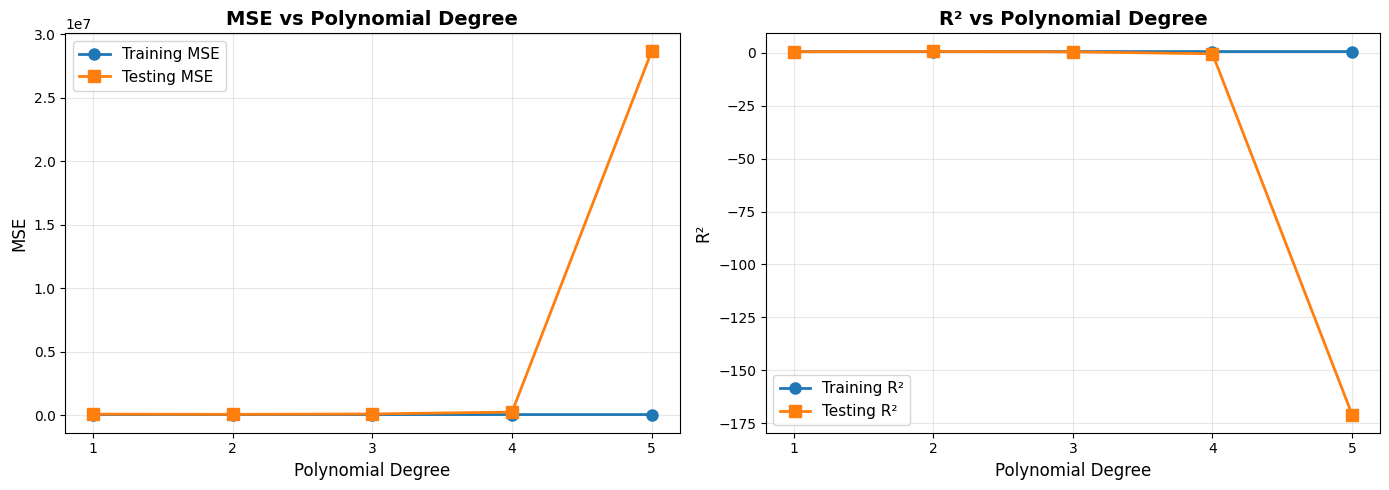


 Visualization saved: problem4_polynomial_regression.png


In [167]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MSE plot
axes[0].plot(poly_results_df['Degree'], poly_results_df['Train MSE'], 
             'o-', linewidth=2, markersize=8, label='Training MSE')
axes[0].plot(poly_results_df['Degree'], poly_results_df['Test MSE'], 
             's-', linewidth=2, markersize=8, label='Testing MSE')
axes[0].set_xlabel('Polynomial Degree', fontsize=12)
axes[0].set_ylabel('MSE', fontsize=12)
axes[0].set_title('MSE vs Polynomial Degree', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(degrees)

# R² plot
axes[1].plot(poly_results_df['Degree'], poly_results_df['Train R²'], 
             'o-', linewidth=2, markersize=8, label='Training R²')
axes[1].plot(poly_results_df['Degree'], poly_results_df['Test R²'], 
             's-', linewidth=2, markersize=8, label='Testing R²')
axes[1].set_xlabel('Polynomial Degree', fontsize=12)
axes[1].set_ylabel('R²', fontsize=12)
axes[1].set_title('R² vs Polynomial Degree', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(degrees)

plt.tight_layout()
plt.savefig('problem4_polynomial_regression.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Visualization saved: problem4_polynomial_regression.png")

---
# Problem 5: Gradient Descent (20 points)

## Implementation

In [165]:
def compute_cost(X, y, theta):
    """Compute MSE cost function"""
    N = len(y)
    X_with_intercept = np.column_stack([np.ones(N), X])
    predictions = X_with_intercept @ theta
    cost = (1 / N) * np.sum((predictions - y) ** 2)
    return cost


def compute_gradient(X, y, theta):
    """Compute gradient of MSE cost function"""
    N = len(y)
    X_with_intercept = np.column_stack([np.ones(N), X])
    predictions = X_with_intercept @ theta
    gradient = (2 / N) * X_with_intercept.T @ (predictions - y)
    return gradient


def gradient_descent(X, y, alpha, num_iterations):
    """Perform gradient descent optimization"""
    N, d = X.shape
    theta = np.zeros(d + 1)
    cost_history = []
    
    for iteration in range(num_iterations):
        gradient = compute_gradient(X, y, theta)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

print("Gradient descent functions defined!")

Gradient descent functions defined!


## Experiments with Different Learning Rates and Iterations

In [147]:
# Test configurations
learning_rates = [0.01, 0.1, 0.5]
iteration_counts = [10, 50, 100]
gd_results = []

for alpha in learning_rates:
    for num_iter in iteration_counts:
        # Train
        theta_gd, _ = gradient_descent(X_train_np, y_train_np, alpha, num_iter)
        
        # Predict
        X_train_int = np.column_stack([np.ones(len(X_train_np)), X_train_np])
        X_test_int = np.column_stack([np.ones(len(X_test_np)), X_test_np])
        
        y_train_pred_gd = X_train_int @ theta_gd
        y_test_pred_gd = X_test_int @ theta_gd
        
        # Metrics
        train_mse_gd = mean_squared_error(y_train_np, y_train_pred_gd)
        train_r2_gd = r2_score(y_train_np, y_train_pred_gd)
        test_mse_gd = mean_squared_error(y_test_np, y_test_pred_gd)
        test_r2_gd = r2_score(y_test_np, y_test_pred_gd)
        
        gd_results.append({
            'Learning Rate': alpha,
            'Iterations': num_iter,
            'Train MSE': train_mse_gd,
            'Train R²': train_r2_gd,
            'Test MSE': test_mse_gd,
            'Test R²': test_r2_gd
        })

In [145]:
# Results table
gd_results_df = pd.DataFrame(gd_results)

print("="*80)
print("GRADIENT DESCENT SUMMARY")
print("="*80)
print("\n" + gd_results_df.to_string(index=False))

GRADIENT DESCENT SUMMARY

 Learning Rate  Iterations     Train MSE       Train R²      Test MSE        Test R²
          0.01          10  2.357278e+05  -1.047365e+00  2.805687e+05  -6.828036e-01
          0.01          50  6.972050e+04   3.944571e-01  9.704954e+04   4.179133e-01
          0.01         100  3.682035e+04   6.802045e-01  6.333304e+04   6.201392e-01
          0.10          10  3.510510e+04   6.951019e-01  6.163043e+04   6.303511e-01
          0.10          50  3.149726e+04   7.264371e-01  5.772248e+04   6.537904e-01
          0.10         100  3.148643e+04   7.265311e-01  5.763896e+04   6.542913e-01
          0.50          10  1.456064e+17  -1.264635e+12  1.626068e+17  -9.752880e+11
          0.50          50  1.259542e+67  -1.093949e+62  1.406601e+67  -8.436553e+61
          0.50         100 3.322792e+129 -2.885942e+124 3.710745e+129 -2.225642e+124


## Convergence Visualization

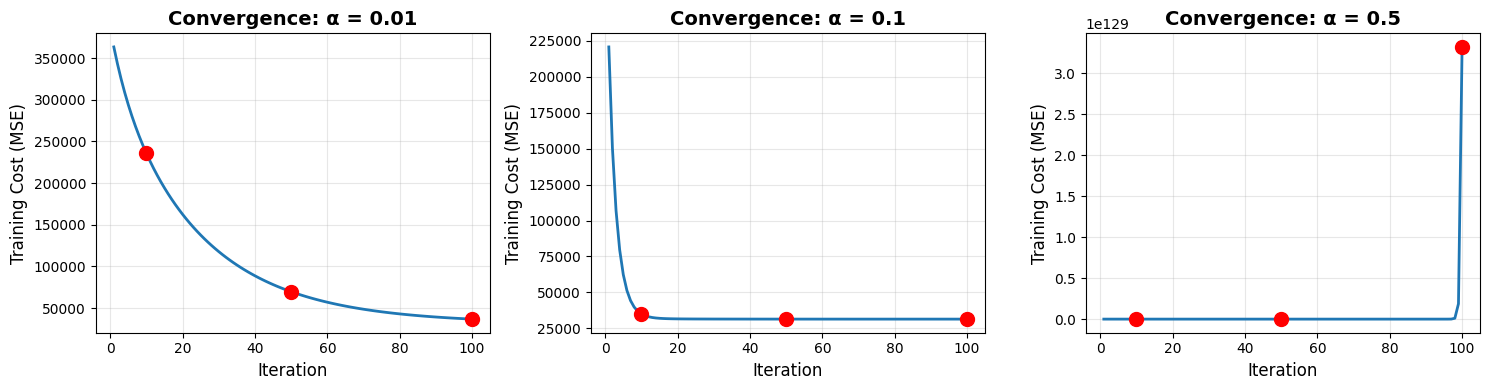


 Visualization saved: problem5_gradient_descent.png


In [185]:
# Convergence plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, alpha in enumerate(learning_rates):
    _, cost_history = gradient_descent(X_train_np, y_train_np, alpha, 100)
    
    axes[idx].plot(range(1, 101), cost_history, linewidth=2)
    axes[idx].set_xlabel('Iteration', fontsize=12)
    axes[idx].set_ylabel('Training Cost (MSE)', fontsize=12)
    axes[idx].set_title(f'Convergence: α = {alpha}', fontsize=14, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    # Mark specific iterations
    for mark in [10, 50, 100]:
        axes[idx].scatter(mark, cost_history[mark-1], color='red', s=100, zorder=5)

plt.tight_layout()
plt.savefig('problem5_gradient_descent.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Visualization saved: problem5_gradient_descent.png")

In [151]:
# Compare with closed-form
print("="*80)
print("COMPARISON WITH CLOSED-FORM SOLUTION")
print("="*80)

best_gd = gd_results_df[(gd_results_df['Learning Rate'] == 0.1) & 
                        (gd_results_df['Iterations'] == 100)].iloc[0]

print(f"\nClosed-form:     Train MSE = {train_mse_closed:.6f}")
print(f"Best GD (α=0.1): Train MSE = {best_gd['Train MSE']:.6f}")
print(f"Difference:      {abs(best_gd['Train MSE'] - train_mse_closed):.8f}")

COMPARISON WITH CLOSED-FORM SOLUTION

Closed-form:     Train MSE = 31486.167776
Best GD (α=0.1): Train MSE = 31486.431792
Difference:      0.26401611


---
# Problem 6: Ridge Regularization (20 points)

## Part 1: Derivation

**Ridge regression loss function:**

$$J(\theta) = \sum_{i=1}^N(h_{\theta}(x_i)-y_i)^2 + \lambda \sum_{j=1}^d \theta_j^2$$

**Matrix form:**

$$J(\theta) = (X\theta - y)^T(X\theta - y) + \lambda\theta^T L\theta$$

where $L$ is the regularization matrix (identity with top-left = 0).

**Taking the derivative and setting to zero:**

$$2X^TX\theta - 2X^Ty + 2\lambda L\theta = 0$$

**Solving for θ:**

$$X^TX\theta + \lambda L\theta = X^Ty$$

$$(X^TX + \lambda L)\theta = X^Ty$$

**Closed-form solution:**

$$\boxed{\theta = (X^TX + \lambda L)^{-1}X^Ty}$$

## Part 2: Implementation with Gradient Descent

In [161]:
def compute_ridge_gradient(X, y, theta, lambda_param):
    """Compute gradient for ridge regression"""
    N = len(y)
    X_with_intercept = np.column_stack([np.ones(N), X])
    predictions = X_with_intercept @ theta
    
    # Base gradient
    base_gradient = (2 / N) * X_with_intercept.T @ (predictions - y)
    
    # Regularization term (don't regularize θ₀)
    regularization = np.zeros_like(theta)
    regularization[1:] = 2 * lambda_param * theta[1:]
    
    return base_gradient + regularization


def ridge_gradient_descent(X, y, lambda_param, alpha=0.01, num_iterations=1000):
    """Perform gradient descent for ridge regression"""
    N, d = X.shape
    theta = np.zeros(d + 1)
    
    for _ in range(num_iterations):
        gradient = compute_ridge_gradient(X, y, theta, lambda_param)
        theta = theta - alpha * gradient
    
    return theta

print("Ridge regression functions defined")

Ridge regression functions defined


## Part 3: Simulated Data Experiment

In [155]:
# Generate simulated data
N_sim = 1000
X_sim = np.random.uniform(-2, 2, N_sim).reshape(-1, 1)
noise = np.random.normal(0, np.sqrt(2), N_sim)
y_sim = 1 + 2 * X_sim.flatten() + noise

print("Simulated data: Y = 1 + 2X + ε")
print(f"N = {N_sim}, ε ~ N(0, 2)")

Simulated data: Y = 1 + 2X + ε
N = 1000, ε ~ N(0, 2)


In [67]:
# %%
# Test different λ values using CLOSED-FORM (stable!)
lambda_values = [0, 1, 10, 100, 1000, 10000]
ridge_results = []

for lam in lambda_values:
    # Use closed-form: θ = (X^T X + λL)^(-1) X^T y
    N = len(X_sim)
    X_with_intercept = np.column_stack([np.ones(N), X_sim])
    
    # Regularization matrix L (don't penalize intercept)
    L = np.eye(X_with_intercept.shape[1])
    L[0, 0] = 0
    
    # Solve
    XTX = X_with_intercept.T @ X_with_intercept
    XTy = X_with_intercept.T @ y_sim
    theta_ridge = np.linalg.solve(XTX + lam * L, XTy)
    
    # Predict
    y_pred_ridge = X_with_intercept @ theta_ridge
    
    # Metrics
    mse_ridge = mean_squared_error(y_sim, y_pred_ridge)
    r2_ridge = r2_score(y_sim, y_pred_ridge)
    
    ridge_results.append({
        'λ': lam,
        'Intercept': theta_ridge[0],
        'Slope': theta_ridge[1],
        'MSE': mse_ridge,
        'R²': r2_ridge
    })
    
    print(f"λ={lam:5d}: Slope={theta_ridge[1]:.6f}, MSE={mse_ridge:.6f}")

λ=    0: Slope=1.981148, MSE=2.099933
λ=    1: Slope=1.979662, MSE=2.099936
λ=   10: Slope=1.966384, MSE=2.100223
λ=  100: Slope=1.842789, MSE=2.125429
λ= 1000: Slope=1.131558, MSE=3.061293
λ=10000: Slope=0.232853, MSE=6.170893


In [157]:
# Results table
ridge_results_df = pd.DataFrame(ridge_results)

print("\n" + "="*80)
print("RIDGE REGRESSION SUMMARY")
print("="*80)
print("\n" + ridge_results_df.to_string(index=False))


RIDGE REGRESSION SUMMARY

    λ  Intercept    Slope      MSE       R²
    0   1.001987 1.981148 2.099933 0.713418
    1   1.001944 1.979662 2.099936 0.713418
   10   1.001567 1.966384 2.100223 0.713379
  100   0.998056 1.842789 2.125429 0.709939
 1000   0.977850 1.131558 3.061293 0.582220
10000   0.952317 0.232853 6.170893 0.157847


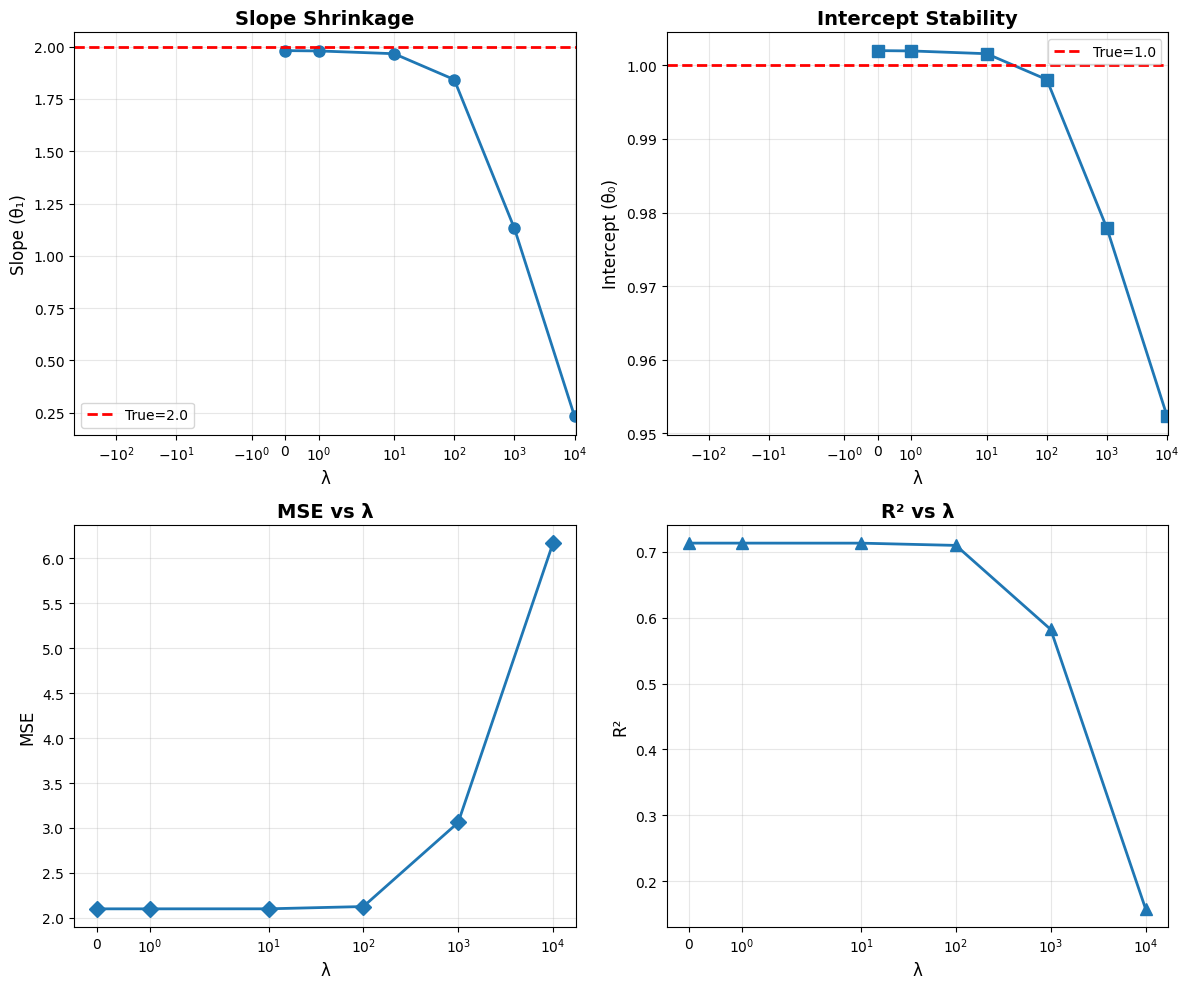

In [159]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Slope vs λ
axes[0,0].plot(ridge_results_df['λ'], ridge_results_df['Slope'], 
               'o-', linewidth=2, markersize=8)
axes[0,0].axhline(2.0, color='red', linestyle='--', linewidth=2, label='True=2.0')
axes[0,0].set_xscale('symlog')
axes[0,0].set_xlabel('λ', fontsize=12)
axes[0,0].set_ylabel('Slope (θ₁)', fontsize=12)
axes[0,0].set_title('Slope Shrinkage', fontsize=14, fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# Intercept vs λ
axes[0,1].plot(ridge_results_df['λ'], ridge_results_df['Intercept'], 
               's-', linewidth=2, markersize=8)
axes[0,1].axhline(1.0, color='red', linestyle='--', linewidth=2, label='True=1.0')
axes[0,1].set_xscale('symlog')
axes[0,1].set_xlabel('λ', fontsize=12)
axes[0,1].set_ylabel('Intercept (θ₀)', fontsize=12)
axes[0,1].set_title('Intercept Stability', fontsize=14, fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)

# MSE vs λ
axes[1,0].plot(ridge_results_df['λ'], ridge_results_df['MSE'], 
               'D-', linewidth=2, markersize=8)
axes[1,0].set_xscale('symlog')
axes[1,0].set_xlabel('λ', fontsize=12)
axes[1,0].set_ylabel('MSE', fontsize=12)
axes[1,0].set_title('MSE vs λ', fontsize=14, fontweight='bold')
axes[1,0].grid(alpha=0.3)

# R² vs λ
axes[1,1].plot(ridge_results_df['λ'], ridge_results_df['R²'], 
               '^-', linewidth=2, markersize=8)
axes[1,1].set_xscale('symlog')
axes[1,1].set_xlabel('λ', fontsize=12)
axes[1,1].set_ylabel('R²', fontsize=12)
axes[1,1].set_title('R² vs λ', fontsize=14, fontweight='bold')
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('problem6_ridge_regression.png', dpi=300, bbox_inches='tight')
plt.show()